# Logistic 回归

<B>优点：</B>计算代价不高，易于理解和实现
<B>缺点：</B>容易欠拟合，分类精度可能不高
使用的函数为 $$\sigma (z) = \frac1{1+e^{-z}}$$
&emsp;&emsp;其中，$z = wx+b$

### Logistic 回归梯度上升优化方法

其中，mat函数将list转化为Numpy矩阵数据类型

In [9]:
def loadDataSet():
    dataMat = []; labelMat =[]
    fr = open('testSet.txt')#每行前两个值为 x1 和 x2， 第三个值是数据对应的类别标签。为了方便，将 x0 设置为了1.0
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

def sigmoid(inX):
    return 1.0/(1+exp(-inX))

def gradAscent(dataMatIn, classLabels):
    dataMatrix = mat(dataMatIn)#将list转化为 numpy矩阵
    labelMat = mat(classLabels).transpose()
    m,n = shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = ones((n, 1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)
        error = (labelMat - h)
        weights = weights + alpha * dataMatrix.transpose() * error# z = w0x0 + w1x1 + w2x2
    return weights

In [11]:
dataArr , labelMat = loadDataSet()
gradAscent(dataArr, labelMat)

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

## 分析数据：画出决策边界

In [19]:
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat, labelMat = loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i, 1])
            ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i, 1])
            ycord2.append(dataArr[i, 2])
            
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x1 = arange(-3.0, 3.0, 0.1)
    x2 = (-weights[0] - weights[1]*x1)/weights[2]
    ax.plot(x1,x2)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

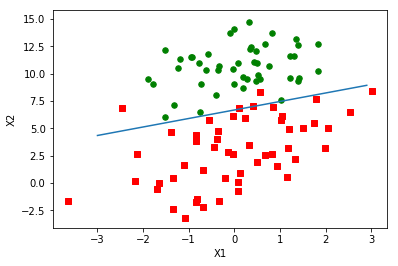

In [20]:
from numpy import *
weights = gradAscent(dataArr, labelMat)
plotBestFit(weights.getA())
#getA和mat函数功能相反，是将 矩阵变成 array数组

## 训练算法：随机梯度上升
### 随机梯度上升算法
上面的梯度上升是所有数据作为一批的

In [21]:
def stocGradAscent0 (dataMatrix, classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.01
    weights = ones(n)
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i] * weights) )
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

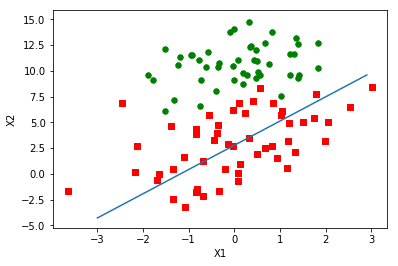

In [22]:
from numpy import *
weights = stocGradAscent0(array(dataArr), labelMat)
plotBestFit(weights)

### 改进的随机梯度上升算法
<B>改进了三个点：</B>
- 添加了numIter作为参数，迭代次数（上面那个全部数据只迭代了一次，少数误差大的点对结果的误差较为明显）
- 改进了alpha参数的选取，将其作为变量，在迭代的过程中变小，但不会减小到0（有常数项0.01）
- 改进了周期选取样本的方式，设立随机数选取样本。这种方法可以减少周期性的波动

In [64]:
def stocGradAscent1 (dataMatrix, classLabels, numIter=150):
    import numpy as np
    m,n = shape(dataMatrix)
    weights = ones(n)
    for j in range(numIter):
        dataIndex = [index for index in range(m)]
        for i in range(m):
            alpha = 4/(1.0+j+i) + 0.01
            randIndex = int(random.uniform(0, len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

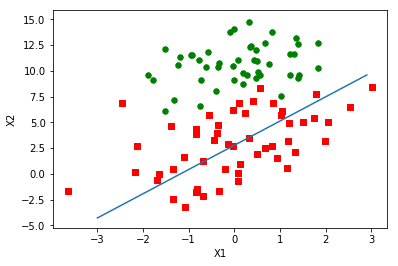

In [65]:
weight = stocGradAscent1(array(dataArr), labelMat)
plotBestFit(weights)